# TP 3 - DA

In [1]:
import numpy as np
np.set_printoptions(threshold=np.nan)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore') 

In [2]:
mouse=  pd.read_csv("mouse.txt", header= None, sep=" ")
X1= mouse.ix[:,0].values
X2= mouse.ix[:,1].values

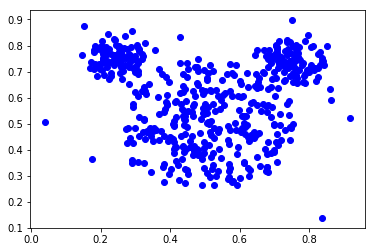

In [3]:
# Donner une représentation graphique des données (matplotlib.pyplot)
plt.plot(X1,X2, 'ro', color='blue')
plt.show()

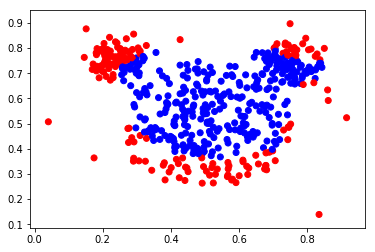

In [24]:
#  Appliquer la technique Isolation Forest pour détecter les anomalies dans ce jeu de données.
from sklearn.ensemble import IsolationForest
# fit the model
clf = IsolationForest(behaviour='new', max_samples=15,
                      random_state=15, contamination='auto')
clf.fit(mouse)
y_pred_train = clf.predict(mouse)
df = pd.DataFrame(dict(Y=y_pred_train))
colors = {-1:'red', 1:'blue'}
plt.scatter(X1,X2, c=df['Y'] .apply(lambda x: colors[x]))
plt.show()

j'ai remarqué que le nombre d'instances abérrantes dépend des valeurs des parametres max_samples et random_state. Le problème est de trouver la bonne combination. 

# 2. Sur le jeu de données des cartes de crédits 

In [14]:
creditcard=  pd.read_csv("creditcard.csv", sep=",")
creditcard.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Préparer ce jeu de données (ne pas utiliser la variable Time). 

In [15]:
#Séparation des cartes
CarteN =creditcard.loc[creditcard['Class'] == 0]
CarteA =creditcard.loc[creditcard['Class'] == 1]


In [16]:
#Echatillonage des variables
rows = np.random.choice(CarteN.index.values, 5000)
CarteN_echan = CarteN.ix[rows]
echantillon = np.concatenate((CarteN_echan,CarteA), axis= 0)
#trans = choice(CarteN, 5000, 1/5000)
X_echatillon = echantillon[:,1:29] # Je commence par 1 pour ne pas utiliser la valeur time
Y = echantillon[:,30]
Y_true =[1 if y==0 else -1 for y in Y ]
print(Y_true)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Appliquer la technique Isolation Forest pour détecter les anomalies dans votre jeu de données.  

In [37]:
clf1 = IsolationForest(behaviour='new', max_samples=15,
                      random_state=5, contamination='auto')
clf1.fit(X_echatillon)
Y_predict = clf1.predict(X_echatillon)

print(Y_predict)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1

Retourner la matrice de confusion et analyser les instances aberrantes détectées.

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_true, Y_predict)

print(classification_report(Y_true, Y_predict, target_names=["-1","1"] ))

              precision    recall  f1-score   support

          -1       0.84      0.73      0.78       492
           1       0.97      0.99      0.98      5000

   micro avg       0.96      0.96      0.96      5492
   macro avg       0.91      0.86      0.88      5492
weighted avg       0.96      0.96      0.96      5492



73% des intentences abérantes on étaient retrouvé par le  modèle par le modèle.

In [ ]:
#Nous allons utilisé GridSearchCV pour trouver la bonne combination.

from sklearn.model_selection import GridSearchCV

n = [i for i in range(1,50)]
parameters = { 'max_samples':n, 'random_state':n }

clf = IsolationForest(behaviour='new', contamination='auto')

GS3 = GridSearchCV(clf, parameters, scoring='accuracy', cv=10) 
GS3.fit(X_echatillon, Y_true)
print(GS3.best_params_)
# cette partie prend beaucoup de temps